### Problem Statement
The e-commerce business is quite popular today. Here, you do not need to take orders by going to each customer. A company launches its website to sell the items to the end consumer, and customers can order the products that they require from the same website. Famous examples of such e-commerce companies are Amazon, Flipkart, Myntra, Paytm and Snapdeal.

Suppose you are working as a Machine Learning Engineer in an e-commerce company named 'Ebuss'. Ebuss has captured a huge market share in many fields, and it sells the products in various categories such as household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products and health care products.

With the advancement in technology, it is imperative for Ebuss to grow quickly in the e-commerce market to become a major leader in the market because it has to compete with the likes of Amazon, Flipkart, etc., which are already market leaders.

As a senior ML Engineer, you are asked to build a model that will improve the recommendations given to the users given their past reviews and ratings.

In order to do this, you planned to build a sentiment-based product recommendation system, which includes the following tasks.

- Data sourcing and sentiment analysis
- Building a recommendation system
- Improving the recommendations using the sentiment analysis model
- Deploying the end-to-end project with a user interface


### Importing Libaries

In [1]:
# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

#Nlp libraries
import nltk
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('stopwords')
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer
import re
from nltk import FreqDist
import pickle
from collections import Counter

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.model_selection import GridSearchCV

from sklearn.metrics.pairwise import pairwise_distances
from sklearn.preprocessing import MinMaxScaler
from numpy import *

pd.set_option('display.max_rows', 500)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Reading the data set

In [2]:
df = pd.read_csv("../Data/sample30.csv")
df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


### Data description

In [3]:
df.shape

(30000, 15)

In [4]:
df.describe()

,reviews_rating
count,30000.000000
mean,4.483133
std,0.988441
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


<b>Insights</b>
- In data desription we could only see the reviews_rating since we have only these category marked as numeric in our datset.

In [5]:
ProductsReviewed = df.name.value_counts()
ProductsReviewed

Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total                                                  8545
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                                            3325
Clorox Disinfecting Bathroom Cleaner                                                                       2039
L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz                             1186
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)                                        1143
Burt's Bees Lip Shimmer, Raisin                                                                             873
The Resident Evil Collection 5 Discs (blu-Ray)                                                              845
Mike Dave Need Wedding Dates (dvd + Digital)                                                                757
Nexxus Exxtra Gel Style Creation Sculptor                                                               

In [6]:
NumberOfProductsReviewed = ProductsReviewed.count()
NumberOfProductsReviewed

271

In [7]:
print("Unique values : \n{}".format(df.nunique()))

Unique values : 
id                        271
brand                     214
categories                270
manufacturer              227
name                      271
reviews_date             6857
reviews_didPurchase         2
reviews_doRecommend         2
reviews_rating              5
reviews_text            27282
reviews_title           18535
reviews_userCity          977
reviews_userProvince       42
reviews_username        24914
user_sentiment              2
dtype: int64


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

<b>Insights</b>
- We could observe Null values in the columns:
    - manufacturer
    - reviews_date
    - reviews_didPurchase
    - reviews_doRecommend
    - reviews_title
    - reviews_userCity
    - reviews_userProvince
    - reviews_username
    - user_sentiment
- Lets treat these null values in our further analysis

### Data cleaning

In [9]:
print("Missing value: \n{}".format(df.isna().sum()))

Missing value: 
id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64


In [10]:
# Percentage of null values
PercentageofNullvalues=((df.isnull().sum()/df.shape[0])*100).round(2)
PercentageofNullvalues

id                       0.00
brand                    0.00
categories               0.00
manufacturer             0.47
name                     0.00
reviews_date             0.15
reviews_didPurchase     46.89
reviews_doRecommend      8.57
reviews_rating           0.00
reviews_text             0.00
reviews_title            0.63
reviews_userCity        93.57
reviews_userProvince    99.43
reviews_username         0.21
user_sentiment           0.00
dtype: float64

### Handling Missing values

In [11]:
# Drop the features which have more than 40 percent null values in it
df.drop(['reviews_didPurchase','reviews_userCity','reviews_userProvince'],axis=1,inplace=True)

In [12]:
# Percentage of null values
PercentageofNullvalues=((df.isnull().sum()/df.shape[0])*100)
PercentageofNullvalues

id                     0.000000
brand                  0.000000
categories             0.000000
manufacturer           0.470000
name                   0.000000
reviews_date           0.153333
reviews_doRecommend    8.566667
reviews_rating         0.000000
reviews_text           0.000000
reviews_title          0.633333
reviews_username       0.210000
user_sentiment         0.003333
dtype: float64

<b>Insights</b>
- Except one column all the columns wherever null vlaues are present, percentage of null vaues is less than 1 percentage.

In [13]:
## Categorical null values are replaced with maximum occuring values over that column/feature

df['reviews_username'].replace(np.NaN,df['reviews_username'].value_counts().index[0],inplace=True)
df['manufacturer'].replace(np.NaN,df['manufacturer'].value_counts().index[0],inplace=True)
df['reviews_date'].replace(np.NaN,df['reviews_date'].value_counts().index[0],inplace=True)
df['reviews_title'].replace(np.NaN,df['reviews_title'].value_counts().index[0],inplace=True)

In [14]:
PercentageofNullvalues=((df.isnull().sum()/df.shape[0])*100)
PercentageofNullvalues

id                     0.000000
brand                  0.000000
categories             0.000000
manufacturer           0.000000
name                   0.000000
reviews_date           0.000000
reviews_doRecommend    8.566667
reviews_rating         0.000000
reviews_text           0.000000
reviews_title          0.000000
reviews_username       0.000000
user_sentiment         0.003333
dtype: float64

<b>Treating reviews_doRecommend column</b>

In [15]:
df['reviews_doRecommend'].value_counts()

True     25880
False     1550
Name: reviews_doRecommend, dtype: int64

<b>Insights</b>
- We have observed that category True has appeared most of the times in the feature: reviews_doRecommend,Lets replace null values with majority category

In [16]:
df['reviews_doRecommend'].replace(np.NaN,df['reviews_doRecommend'].value_counts().index[0],inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   30000 non-null  object
 1   brand                30000 non-null  object
 2   categories           30000 non-null  object
 3   manufacturer         30000 non-null  object
 4   name                 30000 non-null  object
 5   reviews_date         30000 non-null  object
 6   reviews_doRecommend  30000 non-null  bool  
 7   reviews_rating       30000 non-null  int64 
 8   reviews_text         30000 non-null  object
 9   reviews_title        30000 non-null  object
 10  reviews_username     30000 non-null  object
 11  user_sentiment       29999 non-null  object
dtypes: bool(1), int64(1), object(10)
memory usage: 2.5+ MB


<b>Insights</b>
- We have observed in one of the row we have null value in user_sentiment feature.
- Lets verify the row where we have null value and drop them if not necessary

In [18]:
df[df['user_sentiment'].isnull()]

,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
28354,AVpfRTh1ilAPnD_xYic2,Disney,"Movies, Music & Books,Movies,Kids' & Family,Wa...",Walt Disney,Planes: Fire Rescue (2 Discs) (includes Digita...,2014-11-07T00:00:00.000Z,True,5,my kids absolutely loved this film so much tha...,a super hit with my children. they loved it!!??,7.87E+11,NaN


In [19]:
# Drop the null values present 
# axis=0 indicates rows of the data
df.dropna(how='any',axis=0,inplace=True)
df.reset_index(drop=True,inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   29999 non-null  object
 1   brand                29999 non-null  object
 2   categories           29999 non-null  object
 3   manufacturer         29999 non-null  object
 4   name                 29999 non-null  object
 5   reviews_date         29999 non-null  object
 6   reviews_doRecommend  29999 non-null  bool  
 7   reviews_rating       29999 non-null  int64 
 8   reviews_text         29999 non-null  object
 9   reviews_title        29999 non-null  object
 10  reviews_username     29999 non-null  object
 11  user_sentiment       29999 non-null  object
dtypes: bool(1), int64(1), object(10)
memory usage: 2.5+ MB


In [21]:
df.shape

(29999, 12)

<b>Insights</b>
- Now our data is free from null values.

### Feature Analysis

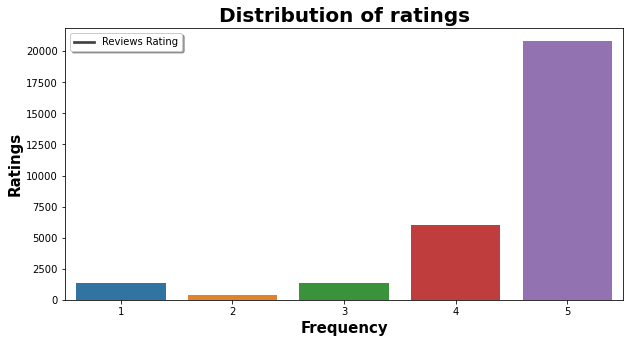

In [22]:
#Plot ratings frequency
plt.figure(figsize=[10,5]) #[width, height]
x = list(df['reviews_rating'].value_counts().index)
y = list(df['reviews_rating'].value_counts())

sns.barplot(x, y, data = df)

plt.title('Distribution of ratings', fontsize=20, weight='bold', color='black', loc='center')
plt.xlabel('Frequency', fontsize=15, weight='bold', color='black')
plt.ylabel('Ratings', fontsize=15, weight='bold', color='black')
plt.legend(['Reviews Rating'], shadow=True, loc=2)

<b>Review Text Word Cloud</b>

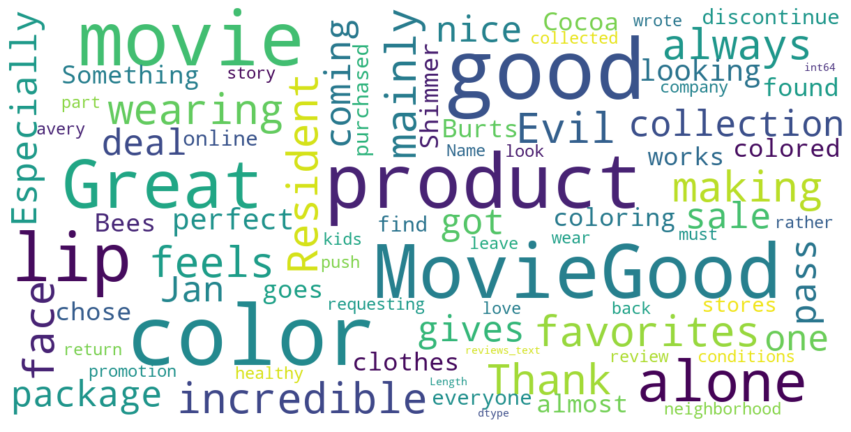

In [23]:
stopwords = set(STOPWORDS)

#Reviews Text word cloud
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=300, max_font_size=40,
                     scale=3, random_state=1).generate(str(df['reviews_text'].value_counts()))
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<b>Reviews Title Word Cloud</b>

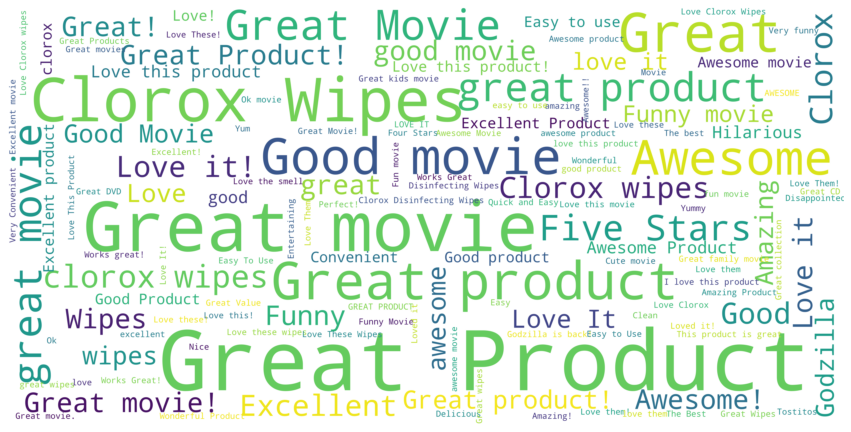

In [24]:
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=400, max_font_size=
                     40, scale=30, random_state=1).generate_from_frequencies((df['reviews_title'].value_counts()))
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

- Lets analyse each feature in the dataset

In [25]:
df[['id','name']].nunique()

id      271
name    271
dtype: int64

In [26]:
df[['id','name']].sample(5)

,id,name
4225,AVpe9W4D1cnluZ0-avf0,Hoover174 Platinum Collection153 Lightweight B...
485,AV1l8zRZvKc47QAVhnAv,Olay Regenerist Deep Hydration Regenerating Cream
12206,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...
23077,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet ...
10087,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...


In [27]:
df[['id','name']].head(5)

,id,name
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd)
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel


<b>Insights</b>
- Its a clear indication that each unique id is assigned to each name of the product for which user has been provided rating

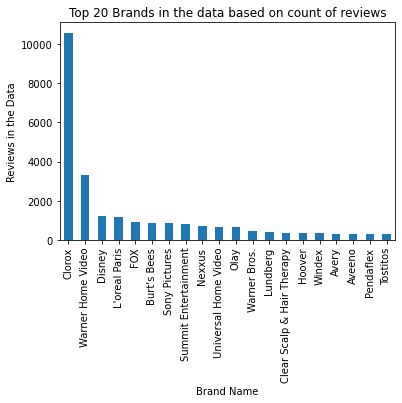

In [28]:
# Display Top 20 Brand names which may help in our further analysis
plt.title('Top 20 Brands in the data based on count of reviews')
df['brand' ].value_counts()[:20].plot(kind='bar')
plt.xlabel('Brand Name')
plt.ylabel('Reviews in the Data')
plt.show()

In [29]:
df['categories'].value_counts()

Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Cleaning & Janitorial Supplies,Cleaners & Disinfectants,Cleaning Wipes & Pads,Cleaning Solutions,Housewares,Target Restock,Food & Grocery,Paper Goods,Wipes,All Purpose Cleaners                                                      8545
Movies, Music & Books,Movies,Action & Adventure,Movies & Music,Movies & TV Shows,Frys                                                                                                                                                                                                                                                                                                                                                                                                    

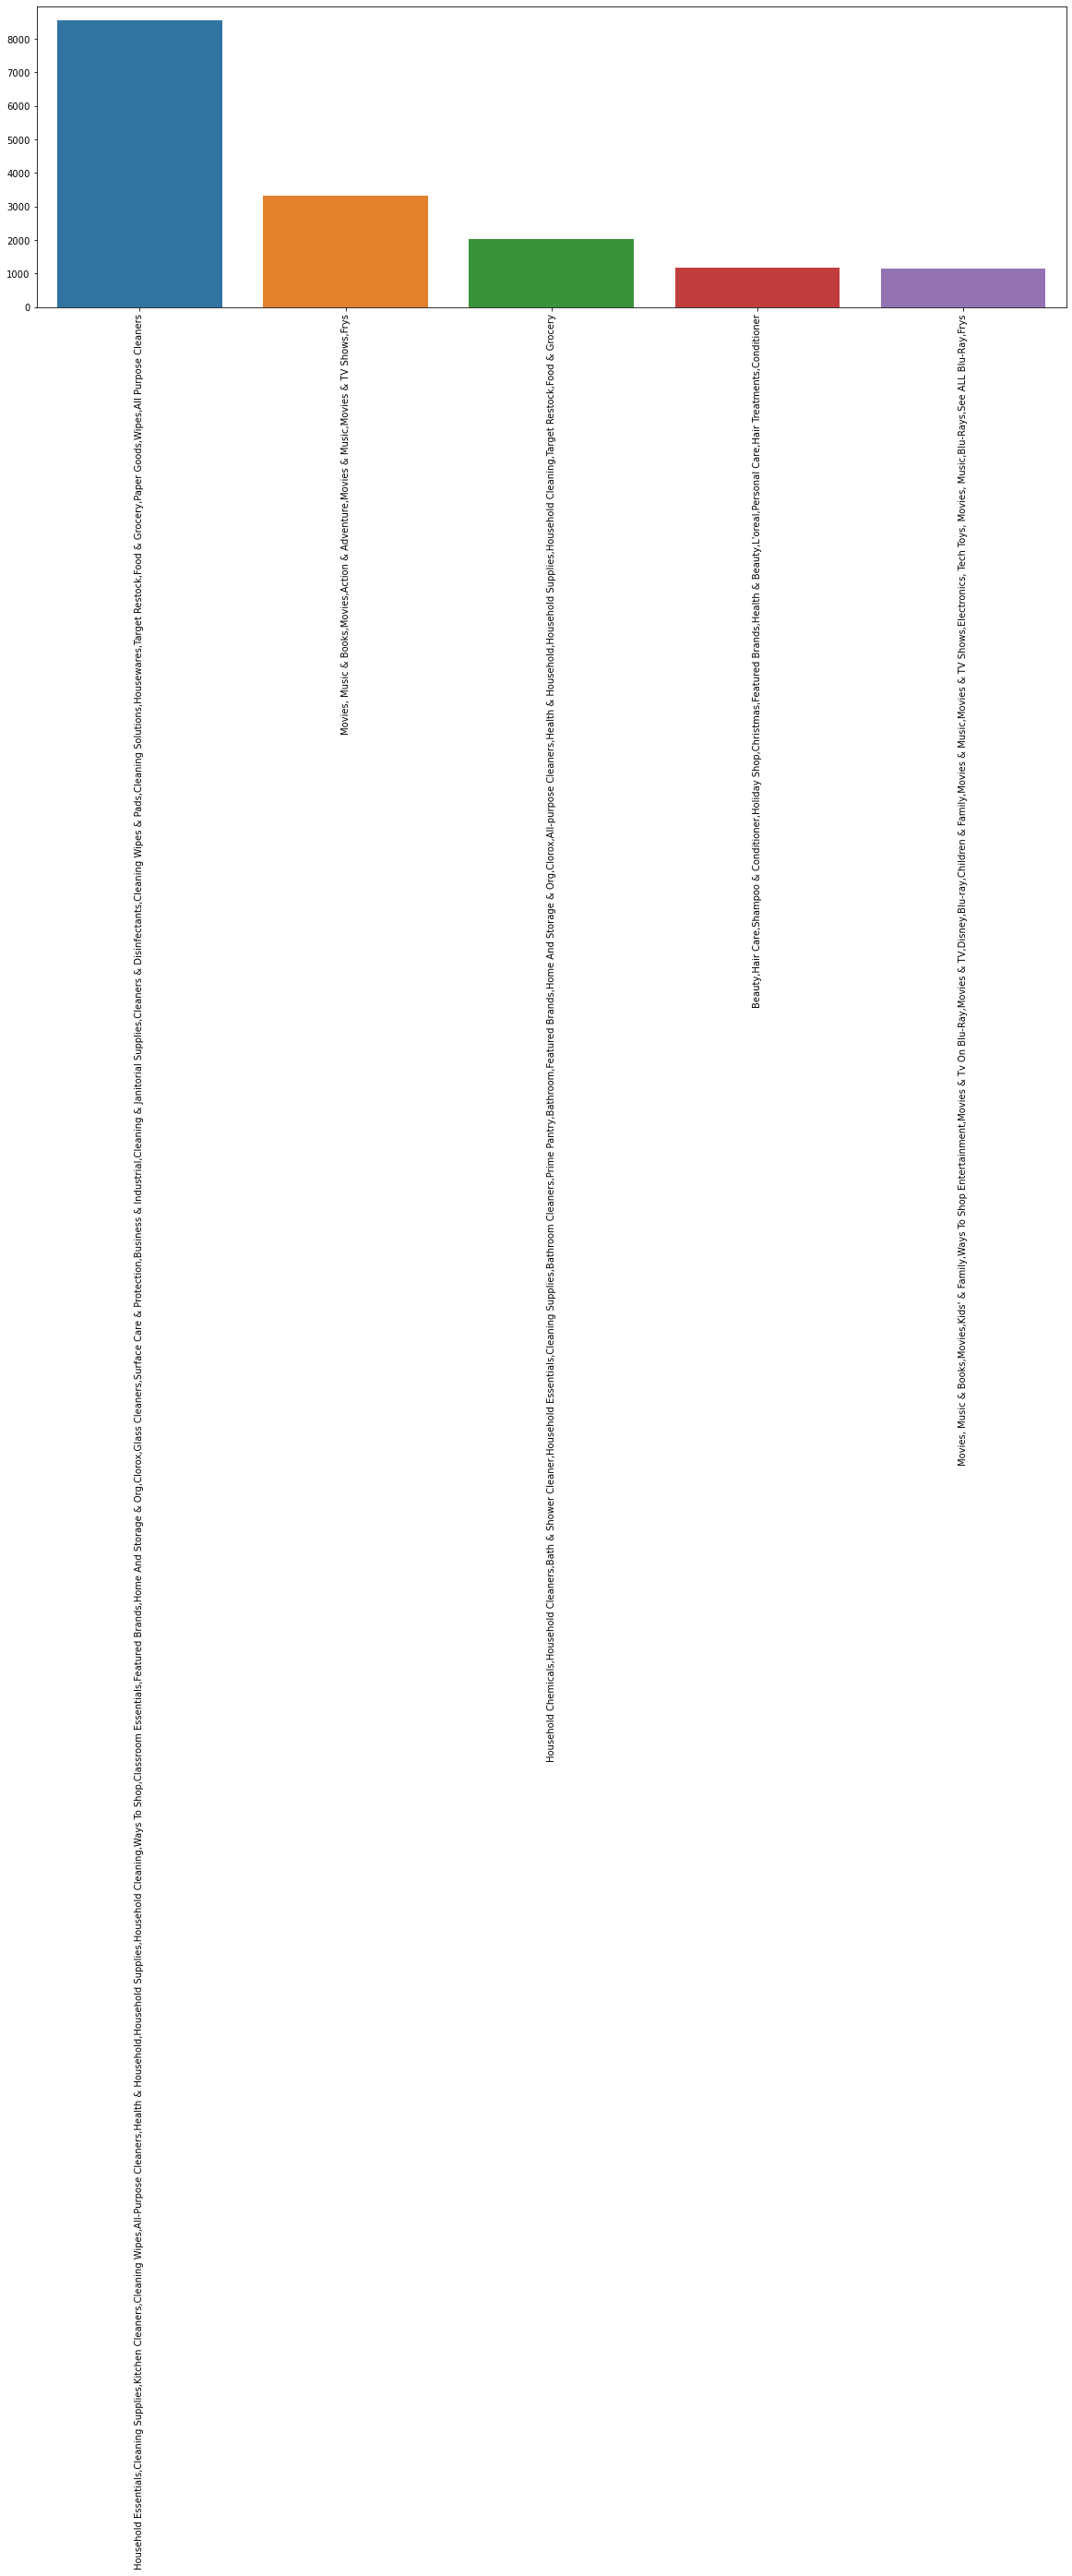

In [30]:
# Display top 5 Categories which has appeared on Top in our dataset
plt. figure(figsize=(20,6))
sns.barplot(df['categories'].value_counts().index[:5],df['categories'].value_counts().values[:5])
plt.xticks (rotation=90)
plt.show()

In [31]:
df['manufacturer'].value_counts()

Clorox                                  8687
Test                                    3325
AmazonUs/CLOO7                          2039
L'oreal Paris                           1232
Walt Disney                             1142
Burt's Bees                              873
SONY CORP                                845
Twentieth Century Fox                    757
P&G                                      730
Nexxus Beauty Products                   693
Summit Entertainment                     672
Universal                                668
Lundberg Family Farms                    412
Clear                                    372
Hoover                                   362
Windex                                   348
Avery Dennison                           313
Aveeno Baby                              313
Esselte Corporation                      310
Tostitos                                 265
1200                                     264
Frito-Lay                                258
TIME WARNE

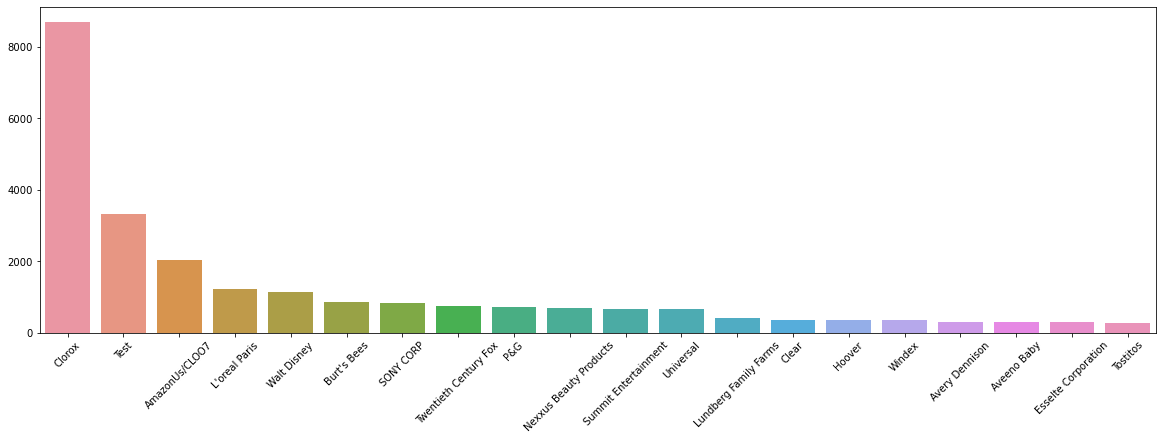

In [32]:
#Bar plot for manufacturer name
plt.figure(figsize=(20,6))
sns.barplot(df['manufacturer'].value_counts().index[:20],df['manufacturer'].value_counts().values[:20])
plt.xticks (rotation=45)
plt.show()

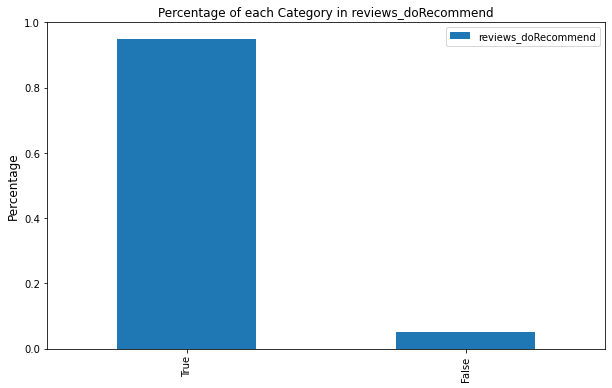

In [33]:
plt.figure(figsize=(10,6))
df['reviews_doRecommend'].value_counts(normalize=True).plot(kind="bar")
plt.title("Percentage of each Category in reviews_doRecommend".format(x))
plt.ylabel('Percentage', fontsize=12)
plt.ylim([0.0, 1.0])
plt.legend()
plt.show()

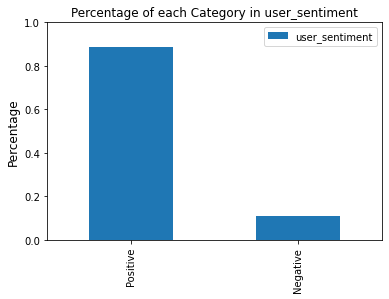

In [34]:
df['user_sentiment'].value_counts(normalize=True).plot(kind="bar")
plt.title("Percentage of each Category in user_sentiment".format(x))
plt.ylabel('Percentage', fontsize=12)
plt.ylim([0.0, 1.0])
plt.legend()
plt.show()

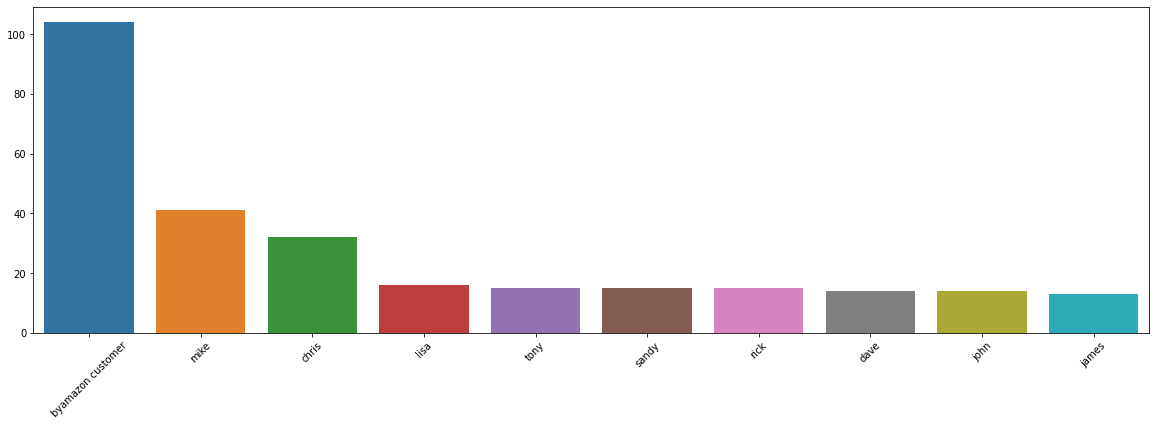

In [35]:
plt.figure(figsize=(20,6))
sns.barplot(df['reviews_username'].value_counts().index[:10],df['reviews_username'].value_counts().values[:10])
plt.xticks (rotation=45)
plt.show()

In [36]:
# Create a new column for extracting the year 
df[ 'year']=[i.split('-') [0] for i in df[ 'reviews_date']]

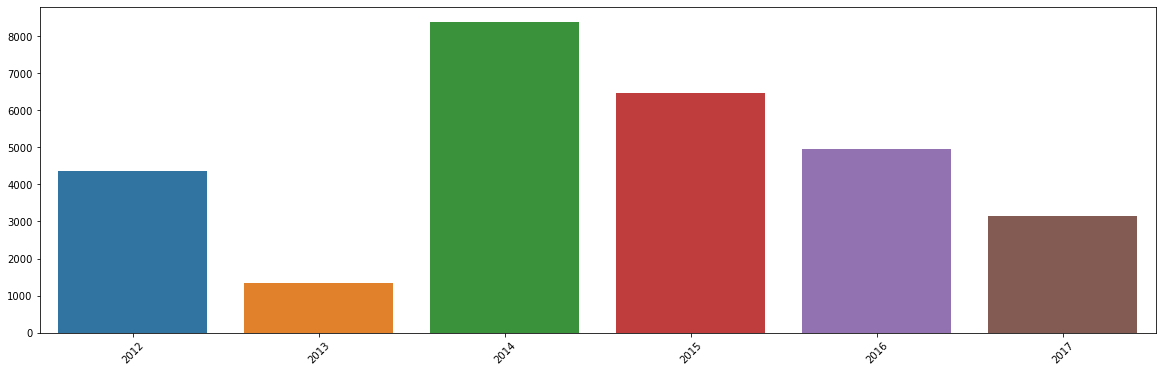

In [37]:
#Bar plot for year
plt.figure(figsize=(20,6))
sns.barplot (df[ 'year'].value_counts ().index[:6], df[ 'year'].value_counts().values [:6])
plt.xticks (rotation=45)
plt.show()

<b>Insights</b>
- Year 2014 has the maximum sale followed by 2015, 2016, 2012.
- Year 2013 has the minimum sale.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   29999 non-null  object
 1   brand                29999 non-null  object
 2   categories           29999 non-null  object
 3   manufacturer         29999 non-null  object
 4   name                 29999 non-null  object
 5   reviews_date         29999 non-null  object
 6   reviews_doRecommend  29999 non-null  bool  
 7   reviews_rating       29999 non-null  int64 
 8   reviews_text         29999 non-null  object
 9   reviews_title        29999 non-null  object
 10  reviews_username     29999 non-null  object
 11  user_sentiment       29999 non-null  object
 12  year                 29999 non-null  object
dtypes: bool(1), int64(1), object(11)
memory usage: 2.8+ MB


### Exploratory Data Analysis

<b>Distribution of reviewed categories</b>

In [39]:
df["product_cat"] = df["categories"].apply(lambda x: x.split(",")[0])
df['product_cat'].value_counts()

Household Essentials        8978
Movies                      6953
Personal Care               4986
Household Chemicals         2343
Movies & TV Shows           1570
Food                        1559
Beauty                      1190
Home                         658
School & Office Supplies     322
Office                       313
Baby                         289
Food & Beverage              241
Music on CD or Vinyl         204
Kitchen & Dining             129
Home Improvement             124
Auto & Tires                  48
Furniture                     36
Featured Brands               23
Health                        13
Sports & Outdoors              6
Clothing                       5
Holiday Shop                   4
Party & Occasions              1
Pro Audio                      1
Patio & Garden                 1
Party Supplies                 1
Gift Finder                    1
Name: product_cat, dtype: int64

In [40]:
df['product_cat'] = df['product_cat'].replace("Movies","Movies & TV Shows")
df['product_cat'] = df['product_cat'].replace("Household Chemicals","Household Essentials")
df['product_cat'] = df['product_cat'].replace("Food","Food & Beverage")

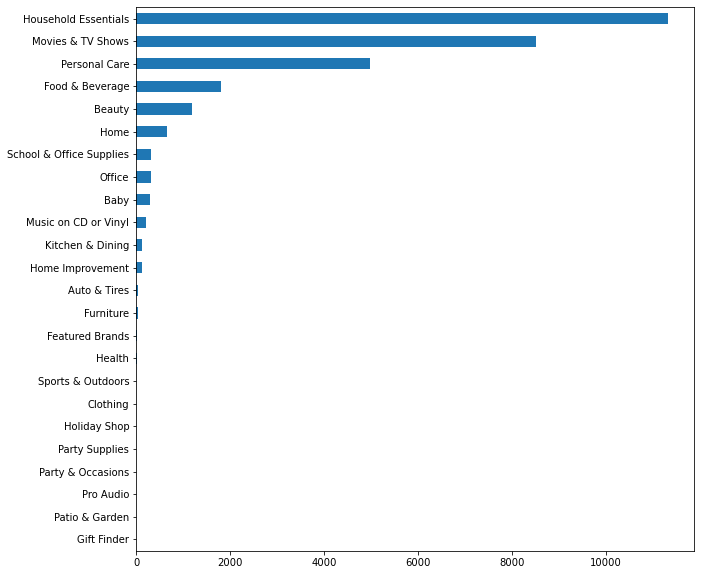

In [41]:
plt.figure(figsize = [10,10])
df['product_cat'].value_counts()[0:25].sort_values().plot(kind = 'barh')

<b>Year Wise Ratings</b>

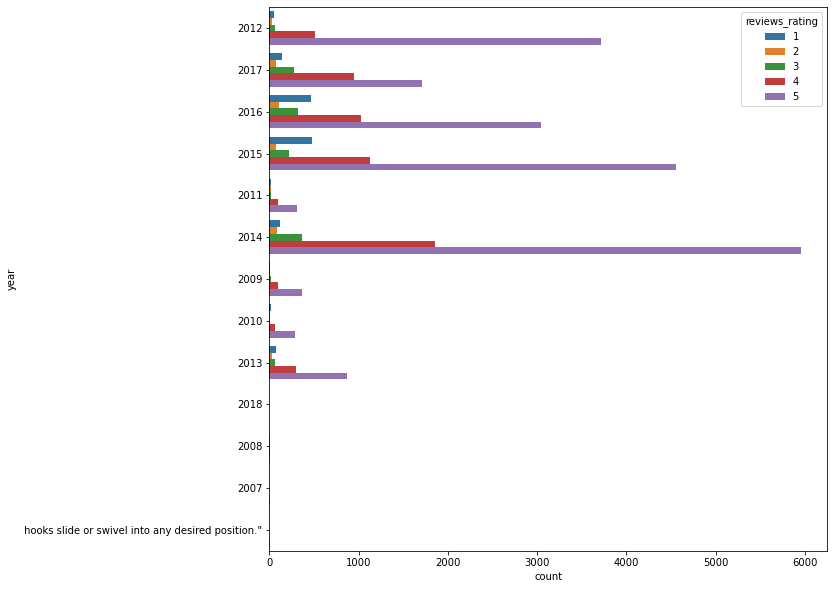

In [42]:
plt.figure(figsize= [10,10])
sns.countplot(y=df['year'], hue=df['reviews_rating'])

<b>Category vs Ratings</b>

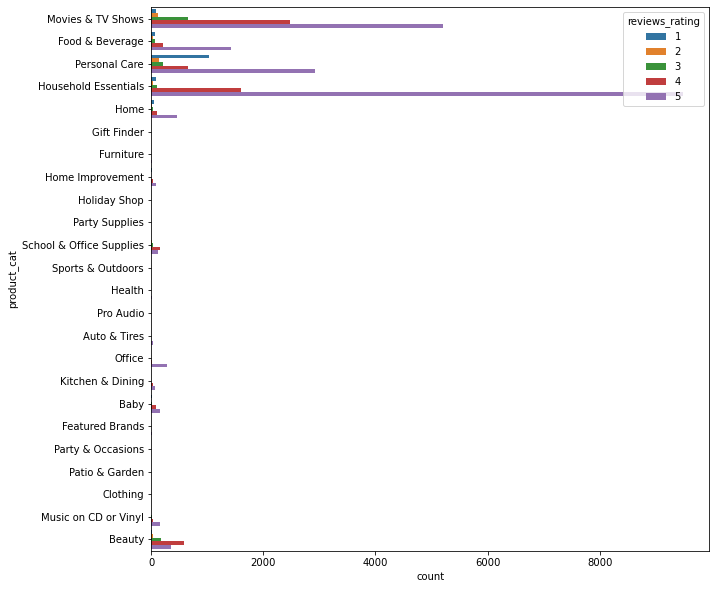

In [43]:
plt.figure(figsize=[10,10])
sns.countplot(y=df['product_cat'], hue=df['reviews_rating'])

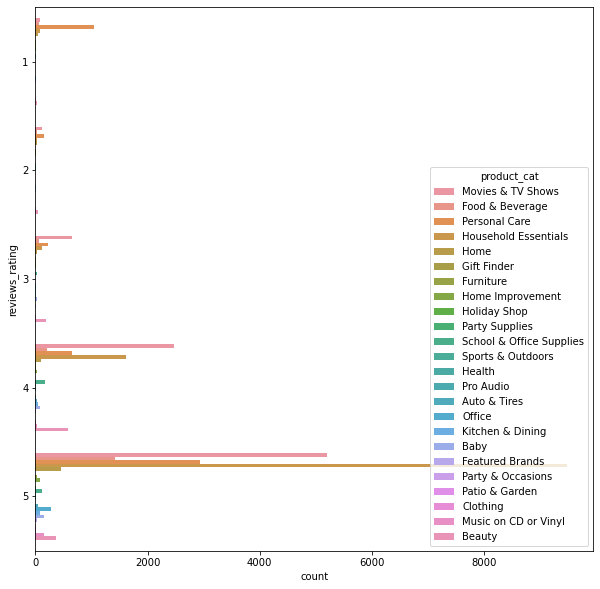

In [44]:
plt.figure(figsize=[10,10])
sns.countplot(y=df['reviews_rating'], hue=df['product_cat'])

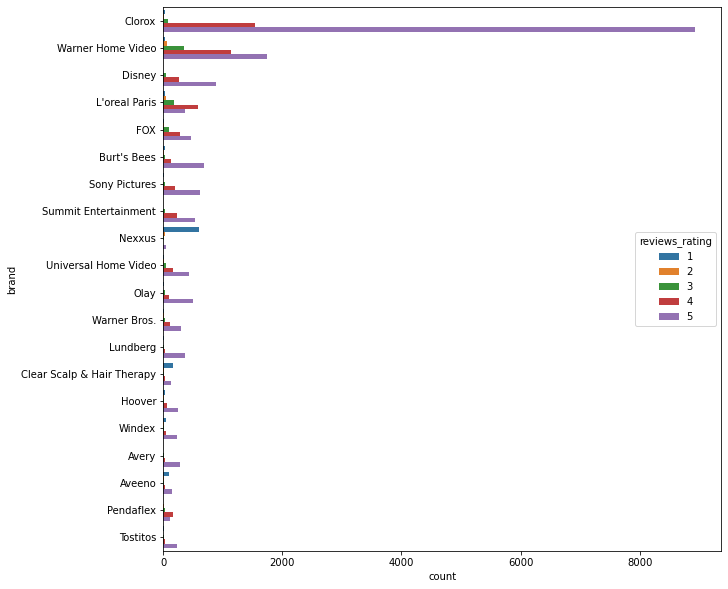

In [45]:
plt.figure(figsize=[10,10])
sns.countplot(y=df['brand'], hue=df['reviews_rating'], order=df['brand'].value_counts().iloc[:20].index)

### Text Processing

<b>Combine Review Text and Title into one</b>

In [46]:
# Joining Review Text and Title 
df['Review'] = df['reviews_title'].map(str) + " " + df['reviews_text'] 

In [47]:
df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,year,product_cat,Review
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,True,5,i love this album. it's very good. more to the...,Just Awesome,joshua,Positive,2012,Movies & TV Shows,Just Awesome i love this album. it's very good...
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,5,Good flavor. This review was collected as part...,Good,dorothy w,Positive,2017,Food & Beverage,Good Good flavor. This review was collected as...
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,5,Good flavor.,Good,dorothy w,Positive,2017,Food & Beverage,Good Good flavor.
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,1,I read through the reviews on here before look...,Disappointed,rebecca,Negative,2016,Personal Care,Disappointed I read through the reviews on her...
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,1,My husband bought this gel for us. The gel cau...,Irritation,walker557,Negative,2016,Personal Care,Irritation My husband bought this gel for us. ...


<b>Lowercasing</b>

In [48]:
# Lowercasing the reviews and title column
df['Review'] = df['Review'].apply(lambda x : x.lower())

In [49]:
df['Review'][0]

"just awesome i love this album. it's very good. more to the hip hop side than her current pop sound.. so hype! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy."

<b>Remove Puntuations</b>

In [50]:
# Remove punctuation 
df['Review'] = df['Review'].str.replace('[^\w\s]','')

In [51]:
df['Review'][0]

'just awesome i love this album its very good more to the hip hop side than her current pop sound so hype i listen to this everyday at the gym i give it 5star rating all the way her metaphors are just crazy'

<b>Remove Stopwords</b>

In [52]:
# Remove Stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['Review'] = df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [53]:
df['Review'][0]

'awesome love album good hip hop side current pop sound hype listen everyday gym give 5star rating way metaphors crazy'

<b>Lemmatization<b/>

In [54]:
# Lemmatization
def get_lemmatized_text(corpus):
    lemmatizer = WordNetLemmatizer()
    return [' '.join([lemmatizer.lemmatize(word.lower()) for word in review.split()]) for review in corpus]

df['Review'] = get_lemmatized_text(df['Review'])

In [55]:
df['Review'][0]

'awesome love album good hip hop side current pop sound hype listen everyday gym give 5star rating way metaphor crazy'

<b>Noise Removal</b>

In [56]:
def scrub_words(text):
    """Basic cleaning of texts."""
    
    # remove html markup
    text=re.sub("(<.*?>)","",text)
    
    #remove non-ascii and digits
    text=re.sub("(\\W|\\d)"," ",text)
    
    #remove whitespace
    text=text.strip()
    return text

In [57]:
df['Review']=df['Review'].apply(lambda x: scrub_words(x))

In [58]:
df['Review'][0]

'awesome love album good hip hop side current pop sound hype listen everyday gym give  star rating way metaphor crazy'

In [59]:
# Converting user_sentiment to integers 1 for positive and 0 for negative
df['user_sentiment'] = df['user_sentiment'].apply(lambda x: 1 if x == "Positive" else 0)

In [60]:
# Saving the processed data
pickle.dump(df, open("../Models/processedData.pkl","wb"))

<b>Word Count</b>

In [61]:
df['Review_WC'] = df['Review'].apply(lambda x: len(str(x).split(" ")))
df[['Review_WC','Review']].head(3)

,Review_WC,Review
0,21,awesome love album good hip hop side current p...
1,7,good good flavor review collected part promotion
2,3,good good flavor


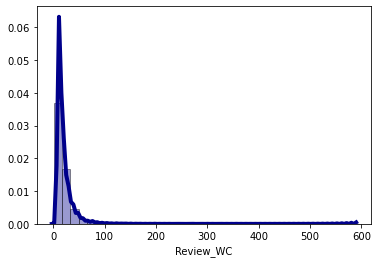

In [62]:
# Density Plot and Histogram of all Word Count
sns.distplot(df['Review_WC'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

<b>Character Count</b>

In [63]:
df['Review_CC'] = df['Review'].str.len() ## this also includes spaces
df[['Review_CC','Review']].head(3)

,Review_CC,Review
0,116,awesome love album good hip hop side current p...
1,48,good good flavor review collected part promotion
2,16,good good flavor


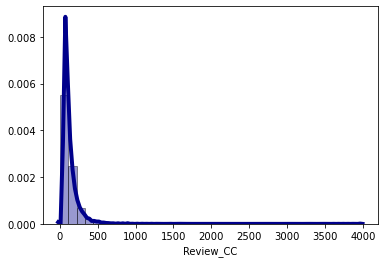

In [64]:
# Density Plot and Histogram of all Character Count
sns.distplot(df['Review_CC'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

<b>Top 30 Common Words</b>

In [65]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,10))
  ax = sns.barplot(data=d, x= "count", y = "word")
  ax.set(ylabel = 'Word')
  plt.show()

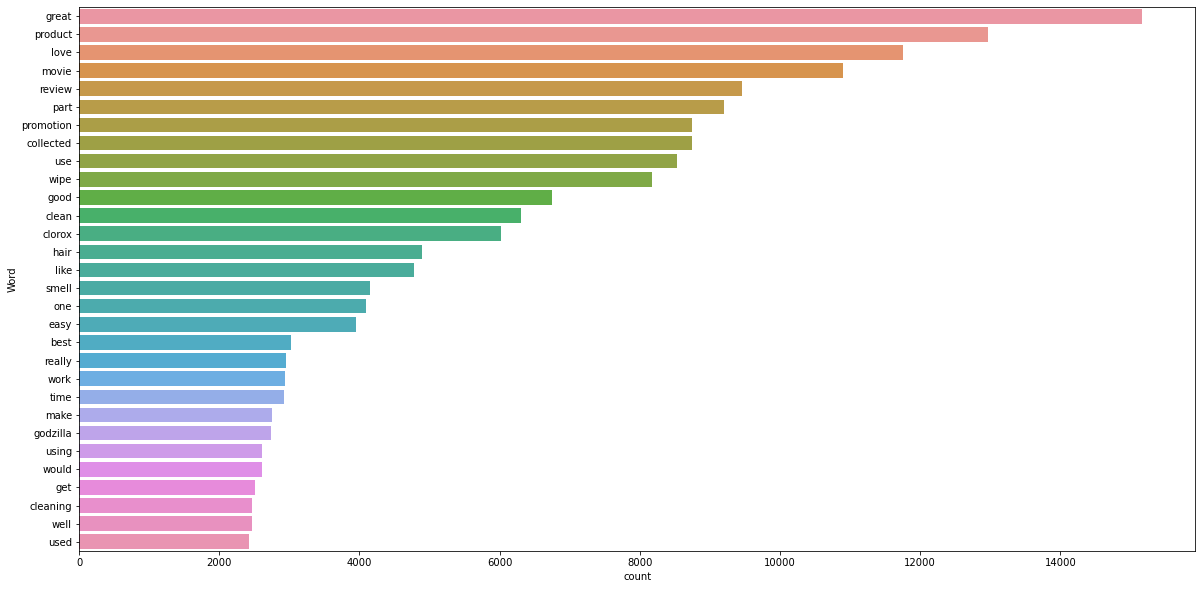

In [66]:
freq_words(df['Review'])

<b>Top 30 Rare Words</b>

In [67]:
# function to plot least frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nsmallest(columns="count", n = terms) 
  plt.figure(figsize=(20,10))
  ax = sns.barplot(data=d, x= "count", y = "word")
  ax.set(ylabel = 'Word')
  plt.show()

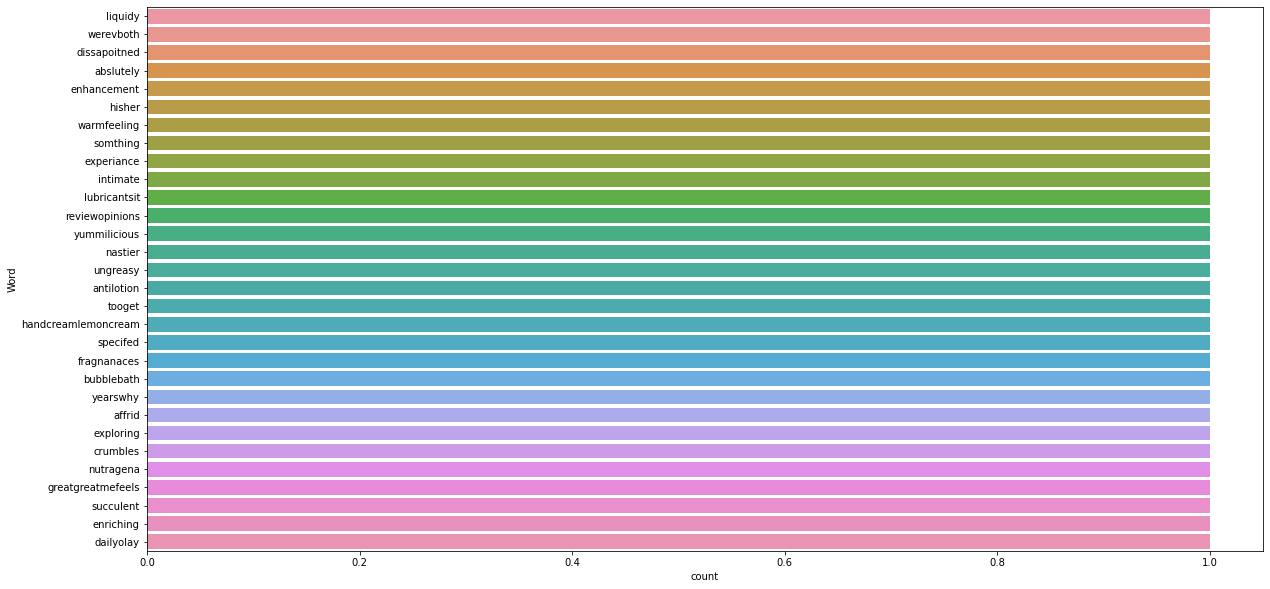

In [68]:
freq_words(df['Review'])

<b>Creating features using tfidf and handling class imbalance using SMOTE</b>

In [69]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2))
tfidf_vectorizer.fit(df['Review'])
X = tfidf_vectorizer.transform(df['Review'])
y = df['user_sentiment']

# Saving the vocabulary used in tfidf vectorizer as features
pickle.dump(tfidf_vectorizer.vocabulary_, open("../Models/features.pkl","wb"))

# Split train test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

<b>Class Imbalance check and method to handle it</b>

In [70]:
df.groupby(['user_sentiment'])['Review','reviews_rating'].count()

,Review,reviews_rating
user_sentiment,,
0,3367,3367
1,26632,26632


In [71]:
counter = Counter(y_train)
print("Before", counter)

#oversampling using SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print("After", counter)

Before Counter({1: 19939, 0: 2560})
After Counter({1: 19939, 0: 19939})


In [72]:
summaryOfModels = pd.DataFrame(columns = ['Classifier','Accuracy','Sensitivity','Specificity'])

### Model 1 - Logistic regression

In [73]:
for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train_sm, y_train_sm)
    cm = confusion_matrix(y_test, lr.predict(X_test))
    print('Sensitivity for C = {0} is {1}'.format(c, cm[1][1]/sum(cm[1])))
    print('Specificity for C = {0} is {1}'.format(c, cm[0][0]/sum(cm[0])))

Sensitivity for C = 0.01 is 0.8320633497684148
Specificity for C = 0.01 is 0.7236679058240396
Sensitivity for C = 0.05 is 0.8520842671447781
Specificity for C = 0.05 is 0.7496902106567535
Sensitivity for C = 0.25 is 0.8948154788585089
Specificity for C = 0.25 is 0.7434944237918215
Sensitivity for C = 0.5 is 0.9152846257283729
Specificity for C = 0.5 is 0.7199504337050805
Sensitivity for C = 1 is 0.9336620349619005
Specificity for C = 1 is 0.6914498141263941


In [74]:
final_lr = LogisticRegression(C=0.05)
final_lr.fit(X_train_sm, y_train_sm)

LogisticRegression(C=0.05)

LogisticRegression(C=0.05)


Accuracy is  0.8410666666666666
Sensitivity is 0.8520842671447781
Specificity is 0.7496902106567535


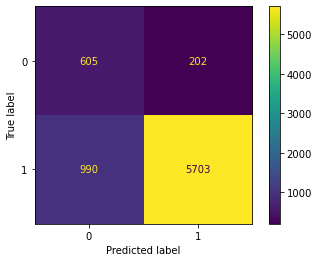

In [75]:
#Test data performance metrics score
cm = confusion_matrix(y_test, final_lr.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_lr.classes_)
disp.plot()
accuracy = accuracy_score(y_test, final_lr.predict(X_test))
sensitivity = cm[1][1]/sum(cm[1])
specificity = cm[0][0]/sum(cm[0])
print(final_lr)
print('\n')
print('Accuracy is ', accuracy)
print('Sensitivity is {}'.format(sensitivity))
print('Specificity is {}'.format(specificity))

summaryOfModels = summaryOfModels.append({'Classifier' : 'Logistic Regression',
                                          'Accuracy' : accuracy,
                                          'Sensitivity' : sensitivity,
                                          'Specificity' : specificity}, 
                ignore_index = True)

In [76]:
feature_to_coef = {
    word: coef for word, coef in zip(
     tfidf_vectorizer.get_feature_names(), final_lr.coef_[0])
}

print('Positive Words')
for best_positive in sorted(
    feature_to_coef.items(),
    key=lambda x: x[1],
    reverse=True)[:10]:
    print(best_positive)
    
print('Negative Words')
for best_negative in sorted(
    feature_to_coef.items(),
    key=lambda x: x[1])[:10]:
    print(best_negative)

Positive Words
('great', 4.8579376015849425)
('clean', 3.5315843391624697)
('love', 3.4700925771700537)
('easy', 2.7427568136578913)
('good', 2.577760122753579)
('best', 2.1395603918437165)
('better', 1.5456974214966812)
('really', 1.4682920740070031)
('nice', 1.4250630767373262)
('loved', 1.4222965706704764)
Negative Words
('bad', -2.3658673485277006)
('disappointed', -1.62500542226023)
('like', -1.596354890045321)
('formula', -1.496852949757093)
('evil', -1.4704516100044818)
('horrible', -1.3667134578549733)
('resident', -1.3603709714248615)
('resident evil', -1.324732712728672)
('terrible', -1.2268659289415664)
('awful', -1.0958023884232637)


### Model 2 - Naive Bayes

In [77]:
# Fitting Naive Bayes Model
nb=MultinomialNB()
nb.fit(X_train_sm, y_train_sm)

MultinomialNB()

MultinomialNB()


Accuracy is  0.8728
Sensitivity is 0.9022859704168534
Specificity is 0.6282527881040892


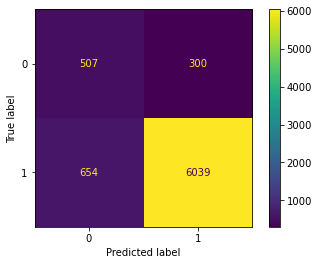

In [78]:
#Test Data Performance Metrics
cm = confusion_matrix(y_test, nb.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)
disp.plot()
accuracy = accuracy_score(y_test, nb.predict(X_test))
sensitivity = cm[1][1]/sum(cm[1])
specificity = cm[0][0]/sum(cm[0])
print(nb)
print('\n')
print('Accuracy is ', accuracy)
print('Sensitivity is {}'.format(sensitivity))
print('Specificity is {}'.format(specificity))

summaryOfModels = summaryOfModels.append({'Classifier' : 'Naive Bayes',
                                          'Accuracy' : accuracy,
                                          'Sensitivity' : sensitivity,
                                          'Specificity' : specificity}, 
                ignore_index = True)

### Model 3 - Random Forest Classifier

In [79]:
rf = RandomForestClassifier()
rf.fit(X_train_sm, y_train_sm)

RandomForestClassifier()

RandomForestClassifier()


Accuracy is  0.9088
Sensitivity is 0.9899895413118183
Specificity is 0.23543990086741015


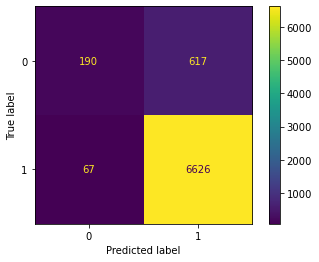

In [80]:
cm = confusion_matrix(y_test, rf.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()
accuracy = accuracy_score(y_test, rf.predict(X_test))
sensitivity = cm[1][1]/sum(cm[1])
specificity = cm[0][0]/sum(cm[0])
print(rf)
print('\n')
print('Accuracy is ', accuracy)
print('Sensitivity is {}'.format(sensitivity))
print('Specificity is {}'.format(specificity))

summaryOfModels = summaryOfModels.append({'Classifier' : 'Random Forest',
                                          'Accuracy' : accuracy,
                                          'Sensitivity' : sensitivity,
                                          'Specificity' : specificity}, 
                ignore_index = True)

### Model 4 - Random Forest classifier with hyperparameters

In [81]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [15, 20],
    'min_samples_leaf': [100,200],
    'min_samples_split': [200,400],
    'n_estimators': [100, 300]
}

# Create a based model
final_rf = RandomForestClassifier()

# Instantiate the grid search model
rf_tuned = GridSearchCV(estimator = final_rf, param_grid = param_grid, scoring='roc_auc', cv = 3, n_jobs = -1,verbose = 1)
rf_tuned.fit(X_train_sm, y_train_sm)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [15, 20], 'min_samples_leaf': [100, 200],
                         'min_samples_split': [200, 400],
                         'n_estimators': [100, 300]},
             scoring='roc_auc', verbose=1)

In [82]:
# print best hyperparameters
print("Best AUC-ROC Score on train data: ", rf_tuned.best_score_)
print("Best hyperparameters: ", rf_tuned.best_params_)

Best AUC-ROC Score on train data:  0.8659505320653808
Best hyperparameters:  {'max_depth': 20, 'min_samples_leaf': 100, 'min_samples_split': 400, 'n_estimators': 300}


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [15, 20], 'min_samples_leaf': [100, 200],
                         'min_samples_split': [200, 400],
                         'n_estimators': [100, 300]},
             scoring='roc_auc', verbose=1)


Accuracy is  0.8312
Sensitivity is 0.8857014791573286
Specificity is 0.379182156133829


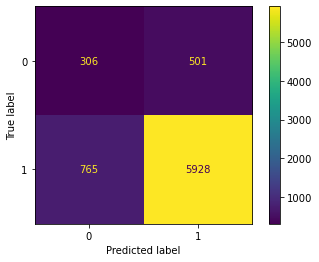

In [83]:
#Test data performance metrics
cm = confusion_matrix(y_test, rf_tuned.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_tuned.classes_)
disp.plot()
accuracy = accuracy_score(y_test, rf_tuned.predict(X_test))
sensitivity = cm[1][1]/sum(cm[1])
specificity = cm[0][0]/sum(cm[0])
print(rf_tuned)
print('\n')
print('Accuracy is ', accuracy)
print('Sensitivity is {}'.format(sensitivity))
print('Specificity is {}'.format(specificity))

summaryOfModels = summaryOfModels.append({'Classifier' : 'Random Forest Tuned',
                                          'Accuracy' : accuracy,
                                          'Sensitivity' : sensitivity,
                                          'Specificity' : specificity}, 
                ignore_index = True)

<b>Summary of models</b>

In [84]:
summaryOfModels = summaryOfModels.set_index('Classifier')
summaryOfModels

,Accuracy,Sensitivity,Specificity
Classifier,,,
Logistic Regression,0.841067,0.852084,0.749690
Naive Bayes,0.872800,0.902286,0.628253
Random Forest,0.908800,0.989990,0.235440
Random Forest Tuned,0.831200,0.885701,0.379182


<b>Insights</b>
- From the above result, Considering Sensitivity and Specificity Logistic Regression model is performing better than the others.
- Considering Accuracy, Random Forest model is performing better.
- Overall Logistic Regression Model is performing better.

In [85]:
# Dump the lr model 
pickle.dump(final_lr,open('../Models/model.pkl','wb'))

### Recommendation System

In [86]:
data = pd.read_csv('../Data/sample30.csv')

In [87]:
df = data[['name','reviews_rating','reviews_username']]

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              30000 non-null  object
 1   reviews_rating    30000 non-null  int64 
 2   reviews_username  29937 non-null  object
dtypes: int64(1), object(2)
memory usage: 703.2+ KB


In [89]:
df =  df[~df.reviews_username.isna()]

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29937 entries, 0 to 29999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              29937 non-null  object
 1   reviews_rating    29937 non-null  int64 
 2   reviews_username  29937 non-null  object
dtypes: int64(1), object(2)
memory usage: 935.5+ KB


In [91]:
df.head()

,name,reviews_rating,reviews_username
0,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,joshua
1,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w
2,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w
3,K-Y Love Sensuality Pleasure Gel,1,rebecca
4,K-Y Love Sensuality Pleasure Gel,1,walker557


In [92]:
train, test = train_test_split(df, test_size=0.30, random_state=31)

In [93]:
print("Shape of training data:",train.shape)
print("Shape of testing data: ",test.shape)

Shape of training data: (20955, 3)
Shape of testing data:  (8982, 3)


In [94]:
df_pivot = train.pivot_table(index='reviews_username',values='reviews_rating',columns='name').fillna(0)
df_pivot.head(3)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
dummy_train = train.copy()

In [96]:
dummy_train.head()

,name,reviews_rating,reviews_username
5704,Red (special Edition) (dvdvideo),4,dwof
12549,Clorox Disinfecting Wipes Value Pack Scented 1...,5,josie225
8534,Clorox Disinfecting Wipes Value Pack Scented 1...,5,mellin1
5671,Red (special Edition) (dvdvideo),4,jerry64gd
21698,Nexxus Exxtra Gel Style Creation Sculptor,1,augale


In [97]:
# The products not rated by user is marked as 1 for prediction. 
dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x>=1 else 1)

In [98]:
dummy_train = dummy_train.pivot_table(
    index='reviews_username',
    columns='name',
    values='reviews_rating'
).fillna(1)

dummy_train.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01impala,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02dakota,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02deuce,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
06stidriver,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### User based recommendation 

#### Cosine Similarity

In [99]:
#calculate usercorrelation
usercorrelation = 1 - pairwise_distances(df_pivot, metric='cosine')
usercorrelation[np.isnan(usercorrelation)] = 0
print(usercorrelation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]


In [100]:
usercorrelation.shape

(18212, 18212)

#### Adjusted Cosine Similarity

In [101]:
# Create a user-product matrix.
df_pivot = train.pivot_table(
    index='reviews_username',
    columns='name',
    values='reviews_rating'
)

df_pivot.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02dakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02deuce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06stidriver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [103]:
df_subtracted.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02dakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02deuce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06stidriver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [105]:
user_correlation.shape

(18212, 18212)

#### Prediction 

In [106]:
user_correlation[user_correlation<0]=0
user_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [107]:
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
user_predicted_ratings

array([[0.        , 3.47249382, 0.        , ..., 6.05943587, 2.30940108,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [108]:
user_predicted_ratings.shape

(18212, 255)

In [109]:
user_predicted_ratings

array([[0.        , 3.47249382, 0.        , ..., 6.05943587, 2.30940108,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [110]:
#Create Finalrating by multiplying userpredictedratings with dummyrecommendtrain data
FinalRating = np.multiply(user_predicted_ratings,dummy_train)
FinalRating.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,3.472494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.85979,...,0.0,1.154701,0.0,0.0,1.558295,0.0,0.0,6.059436,2.309401,0.0
01impala,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
02dakota,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
02deuce,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
06stidriver,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0


<b>Finding top 20 recommendation</b>

In [111]:
# Take the user ID as input.
user_input = input("Enter your user name: ")
print(user_input)

Enter your user name: 00sab00
00sab00


In [112]:
Top20Recommendations = FinalRating.loc[user_input].sort_values(ascending=False)[0:20]
Top20Recommendations

name
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                    59.497748
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)                35.729246
The Resident Evil Collection 5 Discs (blu-Ray)                                     30.742364
Red (special Edition) (dvdvideo)                                                   14.335169
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total                          13.632461
Coty Airspun Face Powder, Translucent Extra Coverage                                9.001445
Jason Aldean - They Don't Know                                                      8.855751
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                               6.059436
Alex Cross (dvdvideo)                                                               5.859790
Pendaflex174 Divide It Up File Folder, Multi Section, Letter, Assorted, 12/pack     5.789666
Lysol Concentrate Deodorizing Cleaner, Original Scent            

#### Evaluation

In [113]:
test.head(2)

,name,reviews_rating,reviews_username
21384,Nexxus Exxtra Gel Style Creation Sculptor,1,curlyd
14483,Clorox Disinfecting Wipes Value Pack Scented 1...,5,prip


In [114]:
# Find out the common users of test and train dataset.
common = test[test.reviews_username.isin(train.reviews_username)]
common.shape

(1976, 3)

In [115]:
common.head()

,name,reviews_rating,reviews_username
21169,Nexxus Exxtra Gel Style Creation Sculptor,1,jjjj
8538,Clorox Disinfecting Wipes Value Pack Scented 1...,5,jygibri
18735,Clorox Disinfecting Bathroom Cleaner,4,jel08
22417,Clear Scalp & Hair Therapy Total Care Nourishi...,1,elena79
19297,Clorox Disinfecting Bathroom Cleaner,5,angc


In [116]:
# convert into the user-product matrix.
common_user_based_matrix = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating')
common_user_based_matrix.head(3)

name,100:Complete First Season (blu-Ray),Alex Cross (dvdvideo),Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Batherapy Natural Mineral Bath Sport Liquid, 16 oz",...,Various - Red Hot Blue:Tribute To Cole Porter (cd),Various Artists - Choo Choo Soul (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123charlie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37f5p,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
# Convert the user_correlation matrix into dataframe.
user_corrdf = pd.DataFrame(user_correlation)
user_corrdf.head()

,0,1,2,3,4,5,6,7,8,9,...,18202,18203,18204,18205,18206,18207,18208,18209,18210,18211
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
df_subtracted.head(1)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
user_corrdf['reviews_username'] = df_subtracted.index
user_corrdf.set_index('reviews_username',inplace=True)
user_corrdf.head()

,0,1,2,3,4,5,6,7,8,9,...,18202,18203,18204,18205,18206,18207,18208,18209,18210,18211
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06stidriver,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [120]:
common.head(1)

,name,reviews_rating,reviews_username
21169,Nexxus Exxtra Gel Style Creation Sculptor,1,jjjj


In [121]:
list_name = common.reviews_username.tolist()

user_corrdf.columns = df_subtracted.index.tolist()


user_corrdf1 =  user_corrdf[user_corrdf.index.isin(list_name)]

In [122]:
user_corrdf1.shape

(1660, 18212)

In [123]:
# Apply Transpose and create a new dataframe
user_corrdf2 = user_corrdf1.T[user_corrdf1.T.index.isin(list_name)]
user_corrdf3 = user_corrdf2.T

In [124]:
user_corrdf3.head()

,1234,123charlie,37f5p,4cloroxl,50cal,7.87E+11,aac06002,abbey,abbi,abby,...,yesseniaw22,yeya,ygtz,yummy,zapman,zburt5,zebras,zippy,zitro,zxcsdfd
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37f5p,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4cloroxl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50cal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [125]:
user_corrdf3.shape

(1660, 1660)

In [126]:
# Since we are considering only positive correlation lets make correlation of less than 0 as 0
user_corrdf3[user_corrdf3<0]=0

# Apply dot product for user_Corrdf3 and sameUserBasedMatrix which we fill nan with 0
common_user_predicted_ratings = np.dot(user_corrdf3, common_user_based_matrix.fillna(0))
common_user_predicted_ratings

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [127]:
#Create a new copy for sameusers
dummy_test = common.copy()

# Apply similar logic in converting values greater than 1 to 0
#call rating function which we created in earlier steps
dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

#Create a pivot table and fill nana values with 0
dummy_test = dummy_test.pivot_table(index='reviews_username', columns='name', values='reviews_rating').fillna(0)

In [128]:
dummy_test.shape

(1660, 127)

In [129]:
common_user_based_matrix.head()

name,100:Complete First Season (blu-Ray),Alex Cross (dvdvideo),Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Batherapy Natural Mineral Bath Sport Liquid, 16 oz",...,Various - Red Hot Blue:Tribute To Cole Porter (cd),Various Artists - Choo Choo Soul (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123charlie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37f5p,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4cloroxl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50cal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
dummy_test.head()

name,100:Complete First Season (blu-Ray),Alex Cross (dvdvideo),Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Batherapy Natural Mineral Bath Sport Liquid, 16 oz",...,Various - Red Hot Blue:Tribute To Cole Porter (cd),Various Artists - Choo Choo Soul (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37f5p,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4cloroxl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50cal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [131]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)

In [132]:
common_user_predicted_ratings.head()

name,100:Complete First Season (blu-Ray),Alex Cross (dvdvideo),Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Batherapy Natural Mineral Bath Sport Liquid, 16 oz",...,Various - Red Hot Blue:Tribute To Cole Porter (cd),Various Artists - Choo Choo Soul (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37f5p,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4cloroxl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50cal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [133]:
X  = common_user_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [134]:
common_ = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating')

In [135]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [136]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.434039100061514


### Item Based Similarity

In [137]:
df_pivot = train.pivot_table(
    index='reviews_username',
    columns='name',
    values='reviews_rating'
).T

df_pivot.head()

reviews_username,00sab00,01impala,02dakota,02deuce,06stidriver,08dallas,09mommy11,1.11E+24,1085,10ten,...,zowie,zozo0o,zpalma,zsazsa,zt313,zuttle,zwithanx,zxcsdfd,zyiah4,zzz1127
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100:Complete First Season (blu-Ray),NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"2x Ultra Era with Oxi Booster, 50fl oz",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [139]:
df_subtracted.head()

reviews_username,00sab00,01impala,02dakota,02deuce,06stidriver,08dallas,09mommy11,1.11E+24,1085,10ten,...,zowie,zozo0o,zpalma,zsazsa,zt313,zuttle,zwithanx,zxcsdfd,zyiah4,zzz1127
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100:Complete First Season (blu-Ray),NaN,NaN,NaN,NaN,NaN,0.324176,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"2x Ultra Era with Oxi Booster, 50fl oz",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Cosine Similarity

In [140]:
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[ 1.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          1.          0.         ... -0.00755288  0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.         -0.00755288  0.         ...  1.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]]


In [141]:
item_correlation.shape

(255, 255)

In [142]:
item_correlation[item_correlation<0]=0
item_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

#### Prediction

In [143]:
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.006633  , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00221326,
        0.00987742],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00368876,
        0.01646236],
       ...,
       [0.        , 0.        , 0.        , ..., 0.00045358, 0.00152992,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00045358, 0.00152992,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00036287, 0.00122393,
        0.        ]])

In [144]:
item_predicted_ratings.shape

(18212, 255)

In [145]:
dummy_train.shape

(18212, 255)

<b>Filtering the rating only for the products not rated by the user for recommendation</b>

In [146]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.006633,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004963,...,0.0,0.062017,0.0,0.000000,0.012466,0.0,0.0,0.000000,0.000000,0.000000
01impala,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010286,...,0.0,0.000000,0.0,0.003953,0.003073,0.0,0.0,0.000000,0.002213,0.009877
02dakota,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017143,...,0.0,0.000000,0.0,0.006589,0.005121,0.0,0.0,0.000000,0.003689,0.016462
02deuce,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013714,...,0.0,0.000000,0.0,0.005271,0.004097,0.0,0.0,0.000000,0.002951,0.013170
06stidriver,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.008853,0.000000,0.0,0.0,0.000454,0.001530,0.000000


#### Finding the top 20 recommendation for the user

In [147]:
# Take the user ID as input
user_input = input("Enter your user name")
#print(user_input)

Enter your user name00sab00


In [148]:
Top20Recommendations = item_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
Top20Recommendations

name
Bilbao Nightstand Gray Oak - South Shore                                0.158656
Vicks Vaporub, Regular, 3.53oz                                          0.133356
Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo)            0.086135
Equals (blu-Ray)                                                        0.080092
Wagan Smartac 80watt Inverter With Usb                                  0.062017
Various - Red Hot Blue:Tribute To Cole Porter (cd)                      0.062017
Feit 60-Watt A19 Gu24 Base Led Light Bulb - Soft White                  0.058509
Diet Canada Dry Ginger Ale - 12pk/12 Fl Oz Cans                         0.045737
D-Con Mice Bait Station - 3ct                                           0.041633
The Seaweed Bath Co. Argan Conditioner, Smoothing Citrus                0.034111
Musselman Apple Sauce, Cinnamon, 48oz                                   0.033075
Chex Muddy Buddies Brownie Supreme Snack Mix                            0.032873
The Resident Evil Colle

#### Evaluation

In [149]:
test.columns

Index(['name', 'reviews_rating', 'reviews_username'], dtype='object')

In [150]:
common =  test[test.name.isin(train.name)]
common.shape

(8964, 3)

In [151]:
common.head()

,name,reviews_rating,reviews_username
21384,Nexxus Exxtra Gel Style Creation Sculptor,1,curlyd
14483,Clorox Disinfecting Wipes Value Pack Scented 1...,5,prip
21169,Nexxus Exxtra Gel Style Creation Sculptor,1,jjjj
25411,Godzilla 3d Includes Digital Copy Ultraviolet ...,5,internetfreak69
20351,Clorox Disinfecting Bathroom Cleaner,5,hb6851


In [152]:
common_item_based_matrix = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T
common_item_based_matrix.shape

(203, 8348)

In [153]:
item_correlation_df = pd.DataFrame(item_correlation)
item_correlation_df.head(1)

,0,1,2,3,4,5,6,7,8,9,...,245,246,247,248,249,250,251,252,253,254
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [154]:
item_correlation_df['name'] = df_subtracted.index
item_correlation_df.set_index('name',inplace=True)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,245,246,247,248,249,250,251,252,253,254
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100:Complete First Season (blu-Ray),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"2x Ultra Era with Oxi Booster, 50fl oz",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [155]:
list_name = common.name.tolist()

item_correlation_df.columns = df_subtracted.index.tolist()

item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]

In [156]:
item_correlation_df_1.shape

(203, 255)

In [157]:
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]

item_correlation_df_3 = item_correlation_df_2.T

In [158]:
item_correlation_df_3.head()

,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,...,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100:Complete First Season (blu-Ray),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Africa's Best No-Lye Dual Conditioning Relaxer System Super,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [159]:
item_correlation_df_3[item_correlation_df_3<0]=0

common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.02105944, 0.00045358, 0.00036287, ..., 0.00045358, 0.00018143,
        0.        ],
       [0.        , 0.00152992, 0.00122393, ..., 0.00152992, 0.00061197,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [160]:
common_item_predicted_ratings.shape

(203, 8348)

In [161]:
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T.fillna(0)

common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

In [162]:
common_ = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T

In [163]:
X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [164]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [165]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

3.5802475754631358


<b>Insights</b>
- RMSE of user based model is less than item based model, so we will use user based model in further processing.

In [166]:
# Dump the user final rating
pickle.dump(FinalRating,open('../Models/FinalRating.pkl','wb'))

### Final Model Decision for deployment

In [167]:
model = pickle.load(open('../Models/model.pkl', 'rb'))
FinalRating = pickle.load(open('../Models/FinalRating.pkl', 'rb'))
data = pickle.load(open('../Models/processedData.pkl', 'rb'))
features = pickle.load(open('../Models/features.pkl', 'rb'))

In [168]:
def recommend(username):
    try:
        # Filter top 20  recommendations
        userRecommendations = FinalRating.loc[username].sort_values(ascending=False)[0:20]
        vectorizer = TfidfVectorizer(vocabulary=features)
        newdf = data[data.name.isin(userRecommendations.index)]
        X = vectorizer.fit_transform(newdf['Review'])
        newdf = newdf[['name']]
        # Make prediction
        newdf['prediction'] = model.predict(X)
        final_df = newdf.groupby('name').sum()
        # Compute the most positive response
        final_df['positive_percent'] = final_df.apply(lambda x: x['prediction'] / sum(final_df['prediction']), axis=1)
        final_list = final_df.sort_values('positive_percent', ascending=False).iloc[:5, :].index
        return final_list

    except:
        return "No User Available /Zero Recommendations for valid user."

In [169]:
inputFromUser =input("Enter the userId : ")

Enter the userId : 00sab00


In [170]:
prediction = recommend(inputFromUser)
if type(prediction) == str:  # compare if output is a string or a dataframe
    print('{}'.format(prediction))
else:  # Output obtained is a dataframe
    print('1. {}\n 2. {}\n 3. {}\n 4. {}\n 5. {}'.format(prediction[0], prediction[1], prediction[2], prediction[3], 
                                                         prediction[4]))

1. Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total
 2. Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd
 3. Clorox Disinfecting Bathroom Cleaner
 4. Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)
 5. Red (special Edition) (dvdvideo)


<b> Above code is used to create ```app.py```</b>

### Summary
- Model Deployed can be accessed from : https://product-recommendationsys.herokuapp.com/

- We are able to provide recommendations when user id is provided, if user is not available we shown Recommendations not available or user not available

- We have built a Sentiment classification initially and we have obtained good results using Logistic Regression with TF-IDF Vectoriser.

- In Recommendation System, we observed that User Based Recommendations had less error rate

- We have filtered Recommendations and applied Considered Positive Ratings across the poducts.